Assignment on Clustering Techniques
Download the following customer dataset from below link:
Data Set: https://www.kaggle.com/shwetabh123/mall-customers
This dataset gives the data of Income and money spent by the customers visiting a Shopping Mall. The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as a mall owner you need to find the group of people who are the profitable customers for the mall owner.
Apply K-Means clustering algorithms (based on Spending Score) to find the group of customers.
a.   	Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if necessary.
b.  	Perform data-preparation (Train-Test Split)
c.   	Apply Machine Learning Algorithm
d.  	Evaluate Model.
e.   	Apply Cross-Validation and Evaluate Mode



In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [7]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [27]:
df=pd.read_csv('Mall_Customers.csv')

In [29]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [33]:
df.rename(columns={'Genre' : 'Gender'},inplace=True)

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
le=LabelEncoder()

In [36]:
df['Gender']=le.fit_transform(df['Gender'])

In [37]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [56]:
x_train,y_test=train_test_split(df,train_size=0.75,test_size=0.25,random_state=20)

In [57]:
x_train.shape

(150, 7)

In [60]:
y_test.shape

(50, 7)

In [38]:
wcf=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters = k,random_state=24)
  kmeans.fit(df)
  wcf.append(kmeans.inertia_)

In [51]:
wcf=[]
for k in range (2,11):
  kmeans=KMeans(n_clusters=k,random_state=20)
  kmeans.fit(df)
  wcf.append(kmeans.inertia_)

In [39]:
wcf

[387065.7137713772,
 271594.4612952265,
 228127.3244573734,
 165308.94369966153,
 122670.55266775498,
 105925.61424013512,
 86295.31641043218,
 77010.1590581194,
 72402.81760512793]

Text(0.5, 1.0, 'Elbow method')

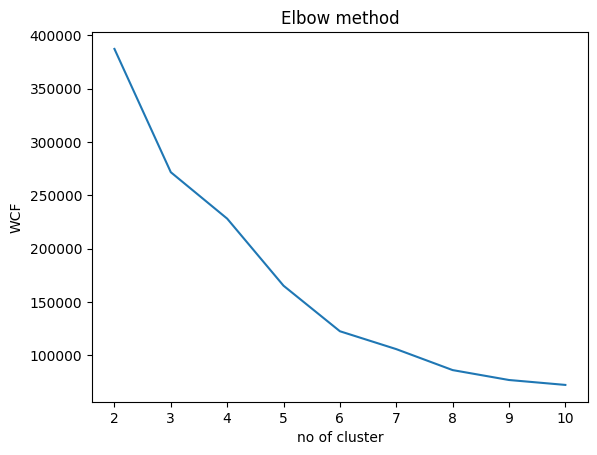

In [41]:
sns.lineplot(x=range(2,11),y=wcf)
plt.xlabel("no of cluster")
plt.ylabel("WCF")
plt.title("Elbow method")

In [42]:
silhouette_scores =[]
for k in range(2,11):
  kmeans=KMeans(n_clusters =k,random_state=20)
  kmeans.fit(df)
  label=kmeans.predict(df)

  score=silhouette_score(df,label)
  silhouette_scores.append(score)


In [53]:
sihlouette_scores =[]
for k in range (2,11):
  kmeans=KMeans(n_clusters=k,random_state=20)
  kmeans.fit(df)
  label=kmeans.predict(df)

  scores=silhouette_score(df,label)
  sihlouette_scores.append(scores)

In [43]:
silhouette_scores

[np.float64(0.4793049017423563),
 np.float64(0.3709023162294255),
 np.float64(0.3009128418192519),
 np.float64(0.42470011832444254),
 np.float64(0.41025863583893935),
 np.float64(0.3916338178790958),
 np.float64(0.37276444827241323),
 np.float64(0.38200780142883206),
 np.float64(0.37911885503246895)]

Text(0, 0.5, 'silhouette scores')

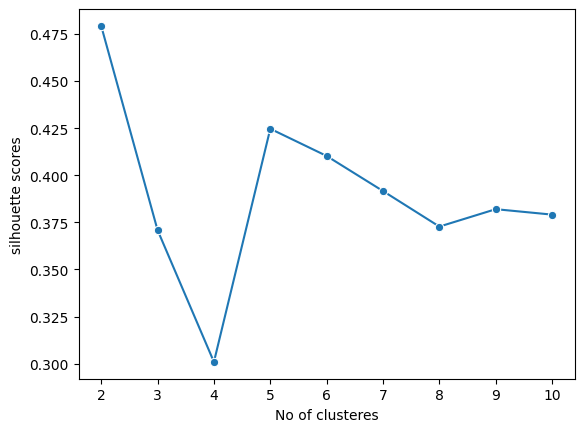

In [48]:
sns.lineplot(x=range(2,11),y=silhouette_scores,marker='o')
plt.xlabel("No of clusteres")
plt.ylabel("silhouette scores")

In [49]:
num_clusters=5
kmeans=KMeans(n_clusters=num_clusters,random_state=25)
df['cluster']=kmeans.fit_predict(df)

In [54]:
num_clusters=5
kmeans=KMeans(n_clusters=num_clusters,random_state=20)
df['clusters']=kmeans.fit_predict(df)

In [55]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,clusters
0,1,1,19,15,39,4,3
1,2,1,21,15,81,1,2
2,3,0,20,16,6,4,3
3,4,0,23,16,77,1,2
4,5,0,31,17,40,4,3


In [61]:
from sklearn.model_selection import KFold

In [68]:
kf=KFold(n_splits =5 ,shuffle=True,random_state=20)
sil_ht=[]
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
for x_ind,y_ind in kf.split(X):
  x_train,x_test=X.iloc[x_ind],X.iloc[y_ind]
  kmeans=KMeans(n_clusters=5,random_state=52)
  kmeans.fit(x_train)
  label=kmeans.predict(x_test)
  silhouette_scores=silhouette_score(x_test,label)
  sil_ht.append(score)

In [69]:
sil_ht

[np.float64(0.37911885503246895),
 np.float64(0.37911885503246895),
 np.float64(0.37911885503246895),
 np.float64(0.37911885503246895),
 np.float64(0.37911885503246895)]